# Machine Learning Project Week 7

## Import Libraries

In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets
from sklearn import metrics


## Import and explore Dataset

In [2]:
bankrupt=pd.read_csv('data.csv')
bankrupt.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
bankrupt.shape

(6819, 96)

In [4]:
bankrupt.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

### Clean dataset, without categorical data, null, nor NAN

In [5]:
bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
# Note for later: our target 'Bankrupt?' is unbalanced
bankrupt['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [7]:
bankrupt.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [8]:
bankrupt_std = pd.DataFrame(bankrupt.std())
bankrupt_std
bankrupt.std()

Bankrupt?                                                   1.767102e-01
 ROA(C) before interest and depreciation before interest    6.068564e-02
 ROA(A) before interest and % after tax                     6.562003e-02
 ROA(B) before interest and depreciation after tax          6.159481e-02
 Operating Gross Margin                                     1.693381e-02
                                                                ...     
 Liability to Equity                                        1.446322e-02
 Degree of Financial Leverage (DFL)                         1.566794e-02
 Interest Coverage Ratio (Interest expense to EBIT)         1.321424e-02
 Net Income Flag                                            1.110304e-16
 Equity to Liability                                        5.001372e-02
Length: 96, dtype: float64

In [9]:
sorted_std = bankrupt_std.sort_values(by=0, ascending=True)

In [10]:
sorted_std

,0
Net Income Flag,1.110304e-16
Working capitcal Turnover Rate,8.959384e-03
Cash Flow to Sales,9.341346e-03
Total Asset Return Growth Rate Ratio,9.634209e-03
Continuous Net Profit Growth Rate,1.006296e-02
...,...
Total Asset Growth Rate,2.897718e+09
Cash Turnover Rate,2.938623e+09
Operating Expense Rate,3.237684e+09
Inventory Turnover Rate (times),3.247967e+09


In [11]:
# It looked like the variance of some feature was null, but this was only due to rounding.
# There is actually no 0 variance

columns_with_zero_std = bankrupt.columns[bankrupt.std() == 0]
columns_with_zero_std

Index([], dtype='object')

In [12]:
# Only the index is Object
bankrupt.select_dtypes(include=["object"])

""
0
1
2
3
4
...
6814
6815
6816
6817


In [13]:
# No NA
bankrupt.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [14]:
bankrupt.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

### Plot histograms for all columns

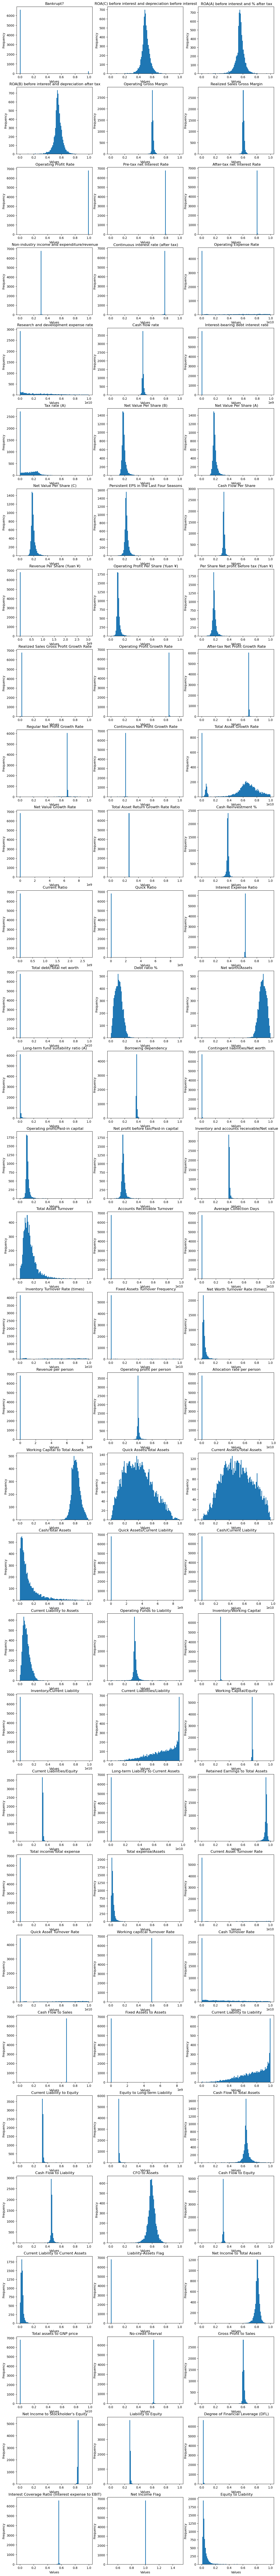

In [15]:
#for column in bankrupt:
#    plt.hist(bankrupt[column], bins=100)
#    plt.title(column)
#    plt.xlabel('Values')
#    plt.ylabel('Frequency')
#    plt.show()

# Rather use subplots for better lisibility

fig, axes = plt.subplots(nrows=len(bankrupt.columns) // 3, ncols=3, figsize=(15, 150))
#fig.tight_layout(pad=3.0)

for i, column in enumerate(bankrupt.columns):
    ax = axes[i // 3, i % 3]  # Get the appropriate subplot
    ax.hist(bankrupt[column], bins=100)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.show()

## Check Multi-collinearity

In [16]:
# Calculate the correlation matrix
correlation_matrix = bankrupt.corr()

# Set a threshold for correlation
threshold = 0.95  # To be finetuned

# Find columns with high correlation
correlated_pairs = []
highly_correlated_columns =[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            correlated_pairs.append((col_i, col_j))
            highly_correlated_columns.append(col_i)
            highly_correlated_columns.append(col_j)

# Print the highly correlated columns
for col_pair in correlated_pairs:
    print(f"Columns '{col_pair[0]}' and '{col_pair[1]}', have a correlation > ", threshold)

Columns ' ROA(C) before interest and depreciation before interest' and ' ROA(B) before interest and depreciation after tax', have a correlation >  0.95
Columns ' ROA(A) before interest and % after tax' and ' ROA(B) before interest and depreciation after tax', have a correlation >  0.95
Columns ' ROA(A) before interest and % after tax' and ' Net Income to Total Assets', have a correlation >  0.95
Columns ' Operating Gross Margin' and ' Realized Sales Gross Margin', have a correlation >  0.95
Columns ' Operating Gross Margin' and ' Gross Profit to Sales', have a correlation >  0.95
Columns ' Realized Sales Gross Margin' and ' Gross Profit to Sales', have a correlation >  0.95
Columns ' Pre-tax net Interest Rate' and ' After-tax net Interest Rate', have a correlation >  0.95
Columns ' Pre-tax net Interest Rate' and ' Continuous interest rate (after tax)', have a correlation >  0.95
Columns ' After-tax net Interest Rate' and ' Continuous interest rate (after tax)', have a correlation >  0.

In [17]:
highly_correlated_columns

[' ROA(C) before interest and depreciation before interest',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(A) before interest and % after tax',
 ' Net Income to Total Assets',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Gross Margin',
 ' Gross Profit to Sales',
 ' Realized Sales Gross Margin',
 ' Gross Profit to Sales',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Pre-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (C)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Persistent EPS in the Last Four Seasons',
 ' Net prof

In [18]:
len(highly_correlated_columns)

46

In [19]:
# Drop duplicates in the column list by converting to set
highly_correlated_columns = list(set(highly_correlated_columns))
len(highly_correlated_columns)

28

In [20]:
# Add target to the list
target_highly_correlated_columns = highly_correlated_columns
target_highly_correlated_columns.append('Bankrupt?')

# Check multicollinearity
bankrupt[target_highly_correlated_columns].corr()

,Net Income to Total Assets,Net profit before tax/Paid-in capital,Current Liability to Liability,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Liability to Equity,After-tax net Interest Rate,Persistent EPS in the Last Four Seasons,ROA(B) before interest and depreciation after tax,Debt ratio %,...,Net Value Per Share (B),Pre-tax net Interest Rate,Operating Profit Per Share (Yuan ¥),Net worth/Assets,Operating profit/Paid-in capital,Net Value Per Share (A),Current Liability to Equity,Gross Profit to Sales,Continuous interest rate (after tax),Bankrupt?
Net Income to Total Assets,1.000000,0.683623,0.066277,0.887670,0.300143,-0.159697,0.045390,0.691152,0.912040,-0.281422,...,0.493776,0.048587,0.577846,0.281422,0.575833,0.493803,-0.150319,0.300146,0.045600,-0.315457
Net profit before tax/Paid-in capital,0.683623,1.000000,0.102487,0.753339,0.248104,-0.104149,0.030568,0.959461,0.726003,-0.164110,...,0.706646,0.033900,0.886157,0.164110,0.887370,0.705800,-0.083819,0.248106,0.030334,-0.207857
Current Liability to Liability,0.066277,0.102487,1.000000,0.052783,0.063547,-0.017927,0.013732,0.107310,0.046694,-0.082322,...,0.044689,0.019009,0.135996,0.082322,0.135385,0.044624,0.086931,0.063546,0.014602,-0.020809
ROA(C) before interest and depreciation before interest,0.887670,0.753339,0.052783,1.000000,0.334719,-0.143629,0.049222,0.775006,0.986849,-0.261427,...,0.505580,0.053419,0.687201,0.261427,0.685028,0.505407,-0.142734,0.334721,0.051328,-0.260807
Operating Gross Margin,0.300143,0.248104,0.063547,0.334719,1.000000,-0.085434,0.027175,0.256722,0.333749,-0.245460,...,0.144661,0.032493,0.267944,0.245460,0.267411,0.145031,-0.080422,1.000000,0.029430,-0.100043
Liability to Equity,-0.159697,-0.104149,-0.017927,-0.143629,-0.085434,1.000000,-0.004390,-0.114114,-0.142838,0.349250,...,-0.110850,-0.004043,-0.077102,-0.349250,-0.075374,-0.111797,0.963908,-0.085434,-0.002996,0.166812
After-tax net Interest Rate,0.045390,0.030568,0.013732,0.049222,0.027175,-0.004390,1.000000,0.030768,0.049952,-0.006174,...,0.031369,0.986379,0.024137,0.006174,0.023942,0.031347,-0.003196,0.027176,0.984452,-0.008857
Persistent EPS in the Last Four Seasons,0.691152,0.959461,0.107310,0.775006,0.256722,-0.114114,0.030768,1.000000,0.764597,-0.177429,...,0.755568,0.033726,0.876769,0.177429,0.873641,0.755409,-0.094966,0.256723,0.032051,-0.219560
ROA(B) before interest and depreciation after tax,0.912040,0.726003,0.046694,0.986849,0.333749,-0.142838,0.049952,0.764597,1.000000,-0.264734,...,0.502052,0.053726,0.659834,0.264734,0.657274,0.502000,-0.142879,0.333750,0.052261,-0.273051
Debt ratio %,-0.281422,-0.164110,-0.082322,-0.261427,-0.245460,0.349250,-0.006174,-0.177429,-0.264734,1.000000,...,-0.249146,-0.003906,-0.078056,-1.000000,-0.077250,-0.249925,0.343692,-0.245461,-0.001192,0.250161


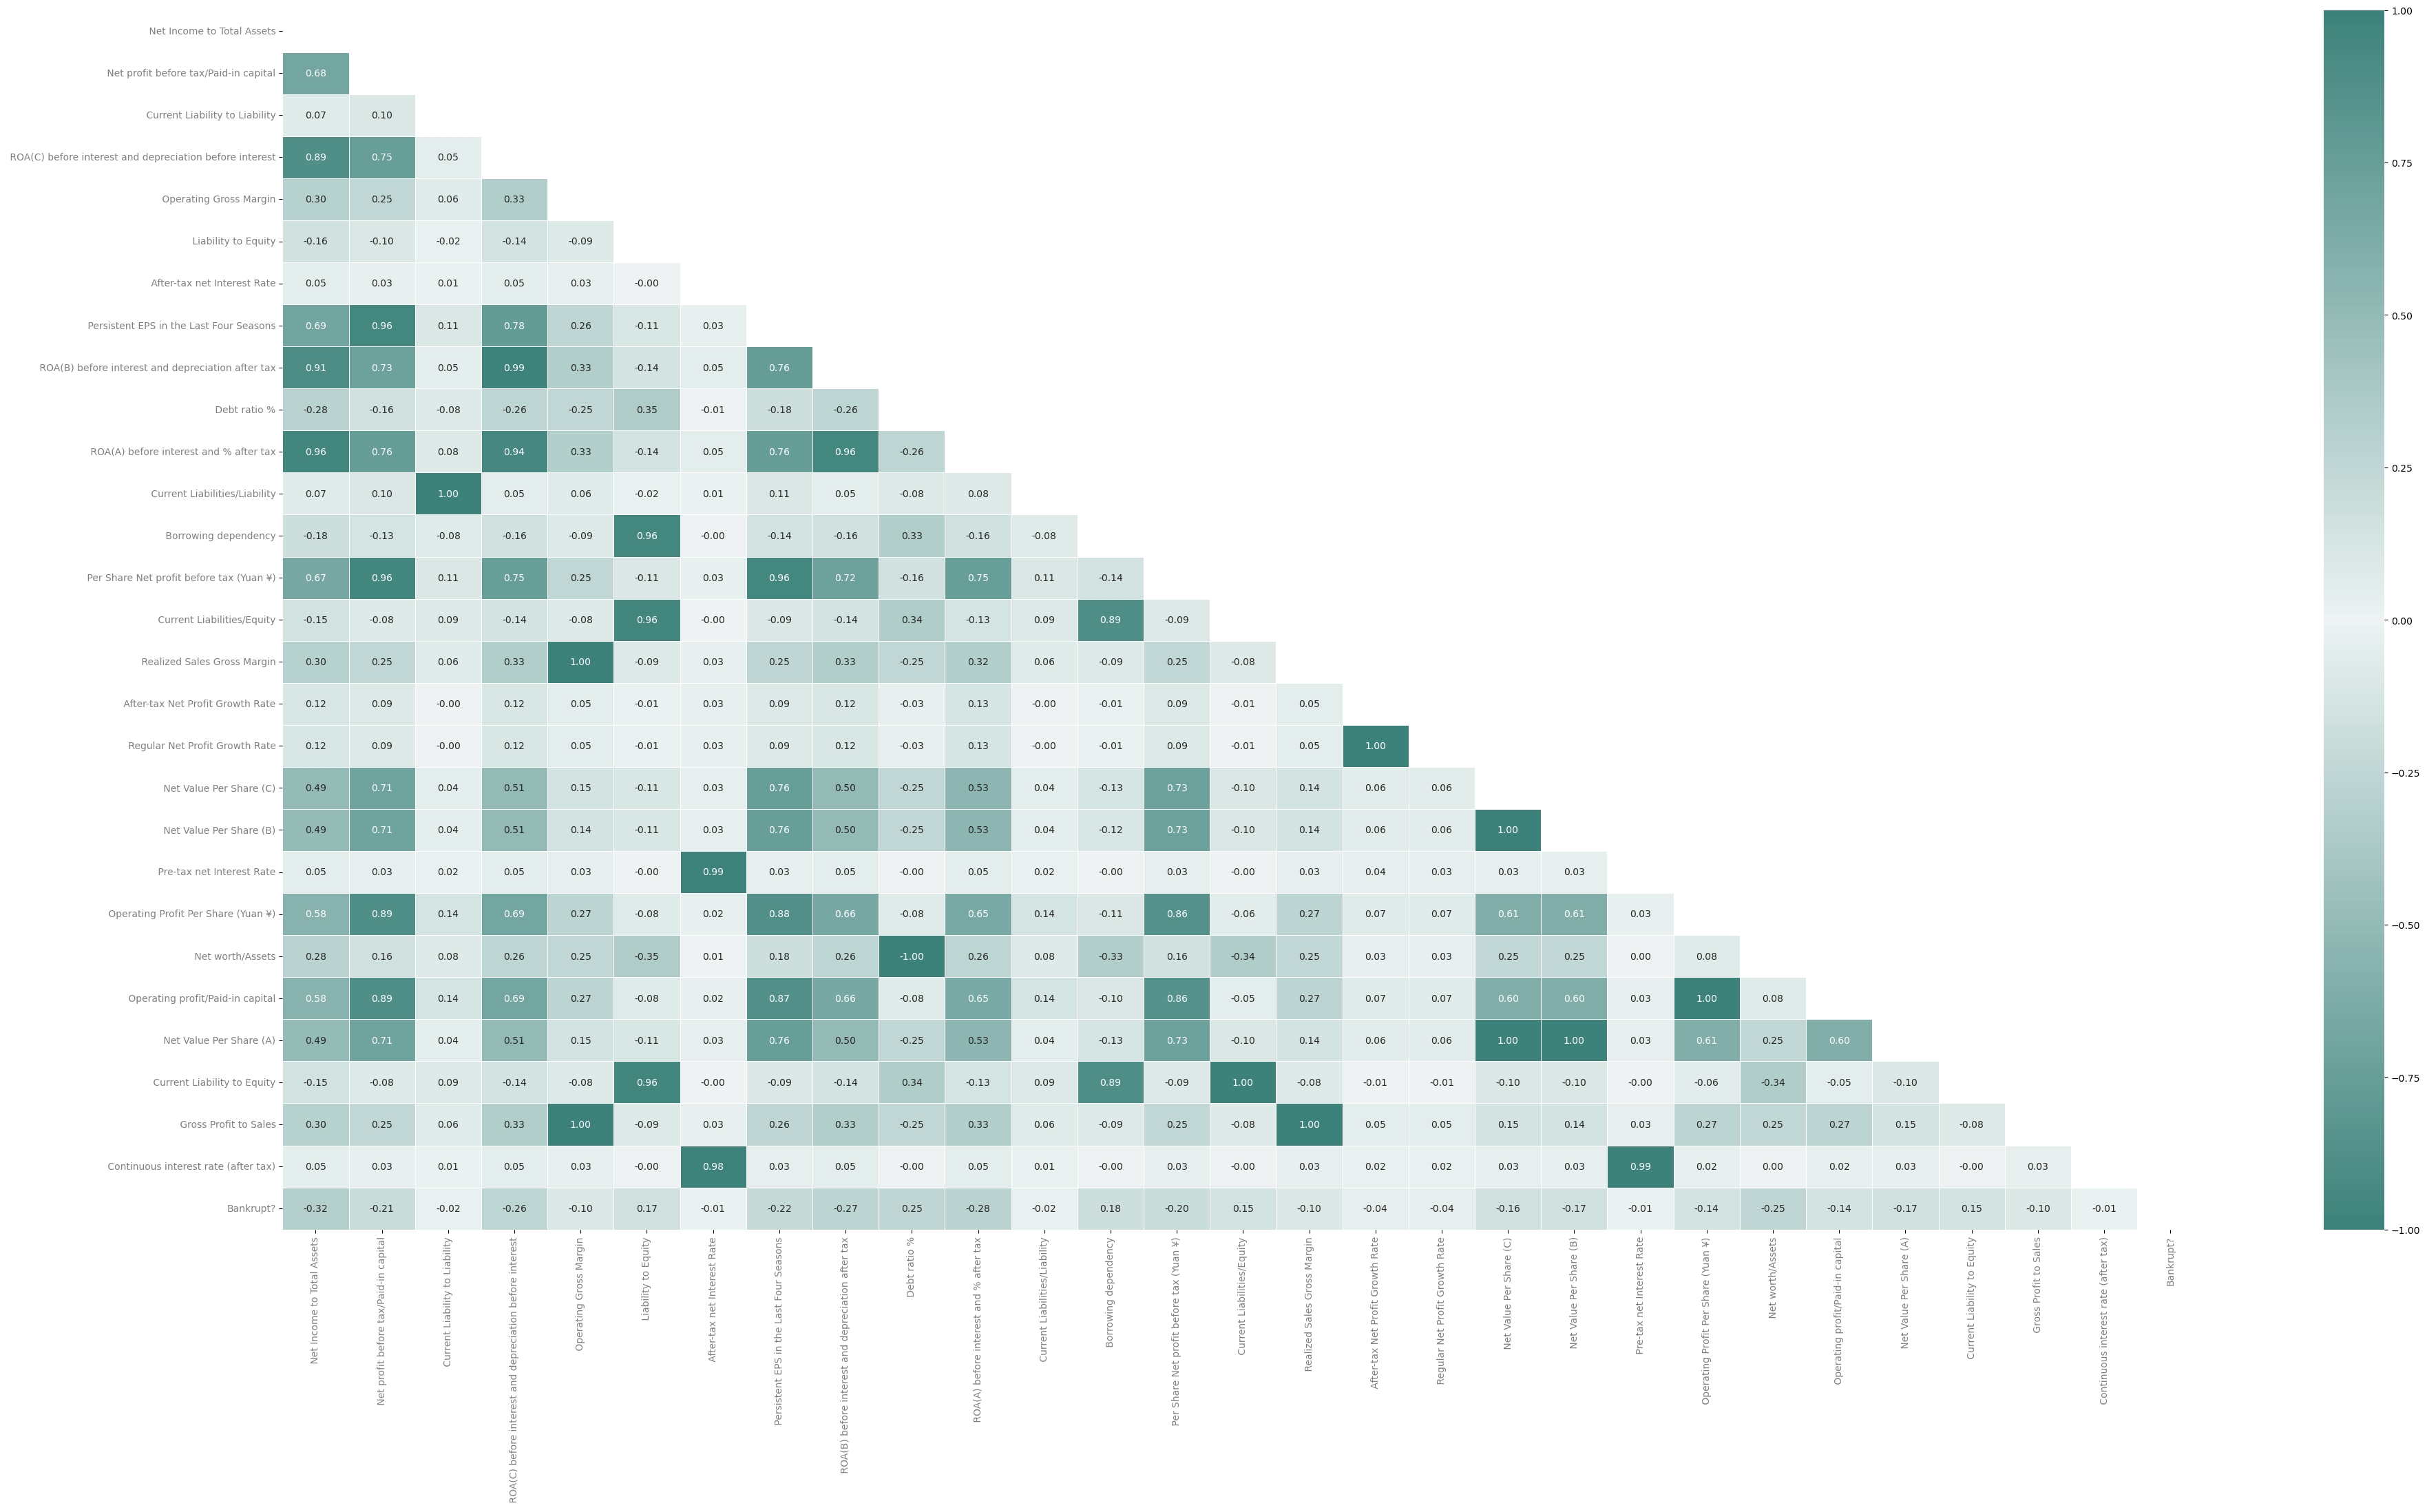

In [21]:
correlations_matrix = bankrupt[target_highly_correlated_columns].corr()
fig, ax = plt.subplots(figsize=(45, 23))

mask = np.zeros_like(correlations_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(180, 180, as_cmap=True)
g = sns.heatmap(correlations_matrix, mask=mask, fmt=".2f", cmap=cmap, linewidths=.5, annot=True)
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
plt.show()

## Drop Columns based on multi-collinearity

In [22]:
# # Create correlation matrix
corr_matrix = bankrupt.corr()
# # # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# # Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Columns to drop: {to_drop}")
print(f"Number of columns to drop; {len(to_drop)}")

# # Drop features
bankrupt.drop(to_drop, axis=1, inplace=True)

Columns to drop: [' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Operating Funds to Liability', ' Current Liabilities/Equity', ' Cash Flow to Sales', ' Current Liability to Liability', ' Current Liability to Equity', ' Net Income to Total Assets', ' Gross Profit to Sales', ' Liability to Equity']
Number of columns to drop; 21


## Scaling, Split Train / Test

In [23]:
# Select the features and the target variable
X = bankrupt.drop('Bankrupt?', axis=1)
y = bankrupt['Bankrupt?']

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scale features
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)

# Transform the X_test
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [26]:
X_test

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
239,0.434456,0.596326,0.998791,0.303237,2.217908e-04,3.040000e+09,0.473117,0.000000e+00,0.000000,0.174076,...,0.314565,0.017526,0,0.001373,0.626305,0.838369,0.026791,0.565157,1,0.087378
2850,0.542534,0.603417,0.999041,0.303526,8.550000e+09,1.550000e+09,0.467422,2.640264e-04,0.251645,0.189078,...,0.314383,0.029840,0,0.001010,0.625384,0.841846,0.026904,0.565645,1,0.028519
2687,0.584897,0.610567,0.999079,0.303560,1.520620e-04,4.620000e+09,0.477995,0.000000e+00,0.248203,0.186928,...,0.322690,0.021286,0,0.001218,0.623886,0.843304,0.026792,0.565161,1,0.048876
6500,0.436942,0.607987,0.998921,0.303408,2.785683e-04,2.410000e+09,0.459603,2.700270e-04,0.000000,0.154903,...,0.299014,0.042961,0,0.000978,0.623608,0.834479,0.026615,0.564153,1,0.014691
2684,0.506898,0.608693,0.999103,0.303503,1.076576e-04,0.000000e+00,0.464343,6.380638e-04,0.061848,0.182167,...,0.316791,0.049027,0,0.003965,0.620144,0.841780,0.027121,0.566357,1,0.019245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0.502023,0.598185,0.998981,0.303539,6.190000e+09,0.000000e+00,0.466850,9.390939e-04,0.279887,0.210105,...,0.312368,0.033365,0,0.021590,0.623829,0.841265,0.027066,0.566198,1,0.032145
3946,0.496758,0.617903,0.998994,0.303590,3.649488e-04,2.030633e-04,0.466932,0.000000e+00,0.000000,0.174118,...,0.309275,0.007641,0,0.000414,0.624072,0.840909,0.026791,0.565158,1,0.097276
5491,0.487788,0.606704,0.998975,0.303501,2.091864e-04,1.451665e-04,0.464855,2.900290e-04,0.000000,0.182040,...,0.314372,0.042482,0,0.005411,0.623685,0.840119,0.032626,0.569425,1,0.019732
2112,0.449081,0.598906,0.998889,0.303140,1.652445e-04,1.020000e+08,0.458435,4.920492e-04,0.000000,0.200961,...,0.314026,0.034925,0,0.029645,0.618200,0.838953,0.026773,0.565071,1,0.017965


In [27]:
X_test_scaled

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-1.165875,-0.657511,0.005879,-0.032632,-0.621320,0.416936,0.323668,-0.151118,-0.839757,-0.494085,...,-0.076776,-0.444978,-0.030289,-0.046338,0.177888,-0.123579,-0.047887,-0.013509,0.0,0.780690
1,0.603753,-0.253989,0.023072,-0.009494,2.011178,-0.156908,-0.003144,-0.151118,0.996165,-0.054993,...,-0.090125,-0.055177,-0.030289,-0.046338,0.108297,0.095616,-0.041365,0.026192,0.0,-0.378907
2,1.297396,0.152814,0.025711,-0.006743,-0.621320,1.025442,0.603600,-0.151118,0.971056,-0.117897,...,0.518940,-0.325932,-0.030289,-0.046338,-0.004882,0.187509,-0.047835,-0.013155,0.0,0.022161
3,-1.125166,0.006004,0.014797,-0.018912,-0.621320,0.174304,-0.451825,-0.151118,-0.839757,-1.055283,...,-1.216941,0.360194,-0.030289,-0.046338,-0.025915,-0.368768,-0.057990,-0.095151,0.0,-0.651330
4,0.020263,0.046193,0.027364,-0.011277,-0.621320,-0.753860,-0.179786,-0.151118,-0.388531,-0.257271,...,0.086453,0.552209,-0.030289,-0.046338,-0.287725,0.091488,-0.028874,0.084123,0.0,-0.561606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,-0.059558,-0.551710,0.018931,-0.008467,1.284547,-0.753860,-0.035970,-0.151118,1.202208,0.560475,...,-0.237829,0.056421,-0.030289,-0.046338,-0.009207,0.059032,-0.032036,0.071241,0.0,-0.307474
1360,-0.145765,0.570280,0.019837,-0.004359,-0.621320,-0.753860,-0.031253,-0.151118,-0.839757,-0.492851,...,-0.464642,-0.757875,-0.030289,-0.046338,0.009128,0.036531,-0.047868,-0.013382,0.0,0.975683
1361,-0.292635,-0.066991,0.018533,-0.011452,-0.621320,-0.753860,-0.150426,-0.151118,-0.839757,-0.260972,...,-0.090883,0.345028,-0.030289,-0.046338,-0.020088,-0.013233,0.288214,0.333722,0.0,-0.552008
1362,-0.926413,-0.510701,0.012604,-0.040383,-0.621320,-0.714577,-0.518823,-0.151118,-0.839757,0.292826,...,-0.116296,0.105799,-0.030289,-0.046338,-0.434621,-0.086722,-0.048907,-0.020501,0.0,-0.586831


In [28]:
# Reset index of Y

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True)

## Rebalance our Target

<AxesSubplot:>

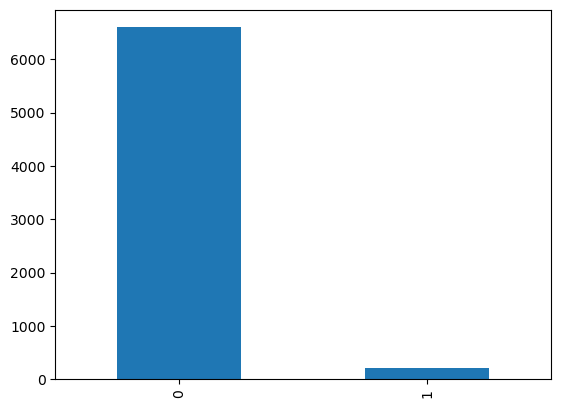

In [29]:
# We need to balance our data as the target values are unbalanced 

count_classes = bankrupt['Bankrupt?'].value_counts()
count_classes.plot(kind = 'bar')

In [30]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,-0.117029,-0.494298,0.019304,-0.009301,1.533941,0.285992,0.029681,-0.151118,0.765013,0.186754,...,-0.002919,-0.030289,-0.046338,-0.022838,0.015833,-0.022084,0.108607,0.0,-0.497254,0
1,0.015474,0.082690,0.022150,-0.010948,-0.621320,-0.753860,-0.387040,-0.151118,-0.839757,-0.505185,...,-0.217584,-0.030289,-0.046338,-0.001396,0.063658,-0.044865,0.005898,0.0,-0.415330,0
2,0.051393,0.361957,0.026728,-0.010425,-0.621320,-0.753860,0.099664,-0.151118,0.536816,1.000800,...,0.069850,-0.030289,-0.046338,-0.017941,0.040348,-0.043660,0.013129,0.0,-0.122053,0
3,-0.093083,-0.572214,0.020520,-0.012362,-0.520331,-0.753860,-0.457408,-0.151118,1.023490,-0.300441,...,-0.013057,-0.030289,-0.046338,0.002672,0.098091,-0.038664,0.040467,0.0,-0.582733,0
4,-0.454671,-0.427864,0.018557,-0.007440,-0.621320,-0.753860,-0.256989,-0.151118,0.249537,0.096715,...,0.052129,-0.030289,-0.046338,-0.008028,0.035049,-0.038209,0.042765,0.0,-0.481160,0


In [31]:
no_bankrupt = train[train['Bankrupt?']==0]
yes_bankrupt = train[train['Bankrupt?']==1]
display(no_bankrupt.shape)
display(yes_bankrupt.shape)

(5286, 75)

(169, 75)

### Oversample

In [32]:
# oversample minority (on the training set only)

yes_bankrupt_oversampled = resample(yes_bankrupt,
                                    replace=True, 
                                    n_samples = len(no_bankrupt),# make sure both sets are the same size
                                    random_state=0)

In [33]:
yes_bankrupt.groupby(yes_bankrupt.columns.tolist(),as_index=False).size()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?,size
0,-7.882002,-0.942109,-0.322660,-0.003371,-0.621320,-0.753860,-1.693132,-0.151118,-0.839757,-1.165056,...,-0.030289,7.134634,-0.010062,-0.829853,-0.047868,-0.013382,0.0,0.141996,1,1
1,-7.183569,-0.342567,0.008208,-0.070904,-0.621320,-0.709570,-0.528642,-0.151118,-0.839757,-2.076541,...,33.015148,-0.046338,-0.022860,10.065443,-0.049482,-0.024548,0.0,-0.759937,1,1
2,-6.604070,-1.252133,0.005546,-0.045073,1.195257,-0.712651,-0.713082,-0.151118,-0.839757,-1.540011,...,-0.030289,-0.046338,-0.023716,-2.622492,-0.049042,-0.021439,0.0,-0.584616,1,1
3,-5.057142,-0.559091,0.015688,-0.178046,-0.621320,-0.029815,0.302682,-0.151118,-0.839757,-3.550458,...,33.015148,-0.046338,-0.036745,1.045000,-0.049124,-0.022015,0.0,-0.863011,1,1
4,-4.972532,-0.965484,-0.005511,-0.028059,-0.621320,1.503004,-0.865369,-0.151118,-0.839757,-1.415437,...,-0.030289,-0.046338,-0.016192,-2.405994,-0.048380,-0.016859,0.0,-0.589914,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.005895,-0.164180,0.024034,-0.011006,-0.323278,-0.180016,-0.576004,-0.151118,-0.839757,-0.115430,...,-0.030289,-0.046338,0.031544,0.099177,-0.023585,0.103530,0.0,-0.590567,1,1
165,0.011482,-0.436066,0.024487,-0.017711,-0.208742,-0.721162,-0.357295,-0.151118,-0.565033,-0.917142,...,-0.030289,-0.046338,0.027385,0.238155,-0.022208,0.108193,0.0,-0.639013,1,1
166,0.230990,0.837244,0.024797,-0.020230,-0.621320,1.175643,-0.086219,-0.151118,3.236788,-0.470650,...,-0.030289,-0.046338,0.001953,-0.005622,-0.032763,0.068130,0.0,-0.169558,1,1
167,0.231788,1.055819,0.024971,-0.015851,-0.621320,-0.753860,-0.252080,-0.151118,-0.839757,-1.401870,...,-0.030289,-0.046338,-0.019977,-0.273376,-0.021489,0.110571,0.0,-0.546684,1,1


In [34]:
yes_bankrupt_oversampled.groupby(yes_bankrupt_oversampled.columns.tolist(),as_index=False).size()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?,size
0,-7.882002,-0.942109,-0.322660,-0.003371,-0.621320,-0.753860,-1.693132,-0.151118,-0.839757,-1.165056,...,-0.030289,7.134634,-0.010062,-0.829853,-0.047868,-0.013382,0.0,0.141996,1,38
1,-7.183569,-0.342567,0.008208,-0.070904,-0.621320,-0.709570,-0.528642,-0.151118,-0.839757,-2.076541,...,33.015148,-0.046338,-0.022860,10.065443,-0.049482,-0.024548,0.0,-0.759937,1,27
2,-6.604070,-1.252133,0.005546,-0.045073,1.195257,-0.712651,-0.713082,-0.151118,-0.839757,-1.540011,...,-0.030289,-0.046338,-0.023716,-2.622492,-0.049042,-0.021439,0.0,-0.584616,1,34
3,-5.057142,-0.559091,0.015688,-0.178046,-0.621320,-0.029815,0.302682,-0.151118,-0.839757,-3.550458,...,33.015148,-0.046338,-0.036745,1.045000,-0.049124,-0.022015,0.0,-0.863011,1,37
4,-4.972532,-0.965484,-0.005511,-0.028059,-0.621320,1.503004,-0.865369,-0.151118,-0.839757,-1.415437,...,-0.030289,-0.046338,-0.016192,-2.405994,-0.048380,-0.016859,0.0,-0.589914,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.005895,-0.164180,0.024034,-0.011006,-0.323278,-0.180016,-0.576004,-0.151118,-0.839757,-0.115430,...,-0.030289,-0.046338,0.031544,0.099177,-0.023585,0.103530,0.0,-0.590567,1,25
165,0.011482,-0.436066,0.024487,-0.017711,-0.208742,-0.721162,-0.357295,-0.151118,-0.565033,-0.917142,...,-0.030289,-0.046338,0.027385,0.238155,-0.022208,0.108193,0.0,-0.639013,1,32
166,0.230990,0.837244,0.024797,-0.020230,-0.621320,1.175643,-0.086219,-0.151118,3.236788,-0.470650,...,-0.030289,-0.046338,0.001953,-0.005622,-0.032763,0.068130,0.0,-0.169558,1,34
167,0.231788,1.055819,0.024971,-0.015851,-0.621320,-0.753860,-0.252080,-0.151118,-0.839757,-1.401870,...,-0.030289,-0.046338,-0.019977,-0.273376,-0.021489,0.110571,0.0,-0.546684,1,28


In [35]:
#See the number of duplicated bankrupt rows.
#e.g. 18 individual rows have been duplicated 34 times, etc.
yes_bankrupt_oversampled.groupby(yes_bankrupt_oversampled.columns.tolist(),as_index=False).size()['size'].value_counts()

34    18
29    15
32    14
30    14
33    11
27    11
31    10
26     9
28     9
36     8
38     6
24     5
37     5
25     5
23     4
45     3
42     3
40     3
39     3
22     3
44     2
16     2
35     2
19     1
17     1
46     1
41     1
Name: size, dtype: int64

In [36]:
# both yes and no sets are now of the same size
display(no_bankrupt.shape)
display(yes_bankrupt_oversampled.shape)

(5286, 75)

(5286, 75)

In [37]:
train_oversampled = pd.concat([no_bankrupt,yes_bankrupt_oversampled],axis=0)
train_oversampled.tail()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
4288,-4.878343,-0.484866,0.008844,-0.091116,-0.62132,0.771256,-0.552997,-0.151118,-0.839757,-1.876730,...,1.390064,-0.030289,-0.046338,-0.050104,-31.246788,-0.048474,-0.017505,0.0,-0.734014,1
3620,-1.443652,-0.792019,-0.013737,-0.375413,-0.62132,-0.753860,-0.420058,-0.151118,-0.839757,-0.500252,...,-0.108470,-0.030289,-0.046338,-0.183053,-0.264310,-0.060384,-0.119498,0.0,-0.479886,1
1584,-1.050933,-0.898640,0.010005,-0.018544,2.26673,0.875242,-0.422368,-0.151118,-0.839757,-0.460783,...,0.318773,-0.030289,-0.046338,-0.108642,-0.103959,-0.076305,-0.372825,0.0,-0.360660,1
4387,-1.949716,-0.515622,0.015179,-0.022303,-0.62132,-0.106841,-0.564259,-0.151118,-0.839757,-0.685262,...,0.407248,-0.030289,-0.046338,-0.020243,-0.515278,-0.056067,-0.077200,0.0,-0.629212,1
1685,-0.257514,-0.212980,0.021498,0.013333,-0.62132,-0.636010,0.032184,-0.151118,0.667531,-0.332509,...,-0.123887,-0.030289,-0.046338,-0.051550,0.081014,-0.038807,0.039741,0.0,-0.451232,1


In [38]:
y_train_over = train_oversampled['Bankrupt?'].copy()
X_train_over = train_oversampled.drop('Bankrupt?',axis = 1).copy()

## Evaluate our models

In [39]:
#function to evaluate our model and store the results
# to compare model results

def evaluate_model(note, Mparam, model, X_test, y_test, results):
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    #true_positives = conf_matrix[0][0]
    true_negatives = conf_matrix[0][0]
    false_positives = conf_matrix[0][1]
    false_negatives = conf_matrix[1][0]
    #true_negatives = conf_matrix[1][1]
    true_positives = conf_matrix[1][1]
    new_result = pd.DataFrame({'note':note,'param':Mparam,'accuracy':score,'precision':precision,'recall':recall,'f1_score':f1,'true_negatives':true_negatives,'false_positives':false_positives,'false_negatives':false_negatives,'true_positives':true_positives},index=[0])
    print(confusion_matrix(y_test, pred))
    return pd.concat([results,new_result],axis=0)
results = pd.DataFrame(columns=['note','param','accuracy','precision','recall','f1_score', 'true_negatives', 'false_positives', 'false_negatives', 'true_positives'])

## Logistic Regression

In [40]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

/Users/adelemartin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.967741935483871

In [41]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred), "(F-Score = measure of a test's accuracy, calculated from the precision and recall)")

precision:  0.7333333333333333
recall:  0.21568627450980393
f1:  0.3333333333333333 (F-Score = measure of a test's accuracy, calculated from the precision and recall)


In [42]:
cm = confusion_matrix(y_test, pred)
cm

array([[1309,    4],
       [  40,   11]])

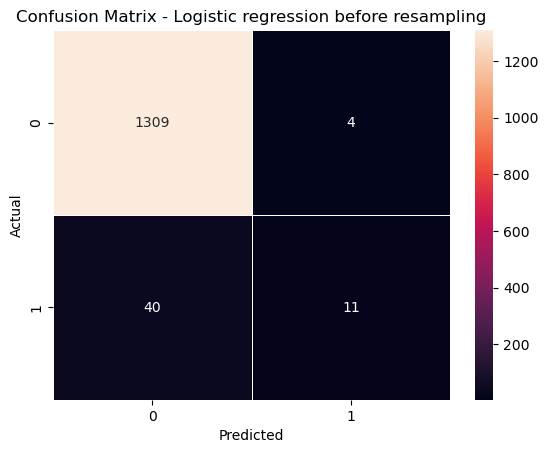

In [43]:
# Plot the confusion matrix

cmap = sns.diverging_palette(180, 180, as_cmap=True)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic regression before resampling")

plt.show()

In [44]:
results = evaluate_model('Logistic regression before resampling', '', LR, X_test_scaled, y_test, results)
results

[[1309    4]
 [  40   11]]


,note,param,accuracy,precision,recall,f1_score,true_negatives,false_positives,false_negatives,true_positives
0,Logistic regression before resampling,,0.967742,0.733333,0.215686,0.333333,1309,4,40,11


### Logistic Regression after oversampling

In [45]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.1895734597156398
recall:  0.7843137254901961
f1:  0.30534351145038163


In [46]:
cm_over = confusion_matrix(y_test,pred)

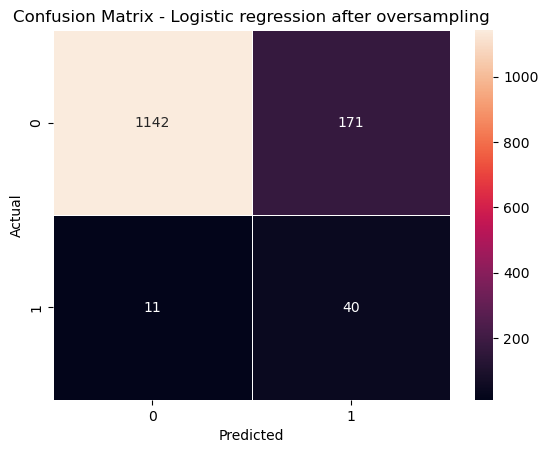

In [47]:
# Plot the confusion matrix

cmap = sns.diverging_palette(180, 180, as_cmap=True)
sns.heatmap(cm_over, annot=True, fmt="d", linewidths=.5)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic regression after oversampling")

plt.show()

In [48]:
results = evaluate_model('Logistic Regression after Oversampling', '', LR, X_test_scaled, y_test, results)
results

[[1142  171]
 [  11   40]]


,note,param,accuracy,precision,recall,f1_score,true_negatives,false_positives,false_negatives,true_positives
0,Logistic regression before resampling,,0.967742,0.733333,0.215686,0.333333,1309,4,40,11
0,Logistic Regression after Oversampling,,0.866569,0.189573,0.784314,0.305344,1142,171,11,40


## ADABoost Classifier

### Test the data before OverSampling

In [49]:
X_train_scaled = train.drop('Bankrupt?', axis=1)
y_train = train['Bankrupt?']

In [50]:
# Create adaboost classifer object
abc3 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model3 = abc3.fit(X_train_scaled, y_train)

#Predict the response for test dataset
y_pred = model3.predict(X_test)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9626099706744868
Precision: 0.0
Recall: 0.0
f1_score: 0.0


/Users/adelemartin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Test the data after OverSampling

In [52]:
X_train_oversampled = X_train_over
Y_train_oversampled = y_train_over

In [53]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train_oversampled, Y_train_oversampled)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.906158357771261
Precision: 0.17647058823529413
Recall: 0.4117647058823529
f1_score: 0.24705882352941178


### Add ADABoost results to our Evaluation table

In [55]:
results = evaluate_model('AdaBoostClassifier before OverSampling', '', model3, X_test_scaled, y_test, results)
results

[[1302   11]
 [  35   16]]


,note,param,accuracy,precision,recall,f1_score,true_negatives,false_positives,false_negatives,true_positives
0,Logistic regression before resampling,,0.967742,0.733333,0.215686,0.333333,1309,4,40,11
0,Logistic Regression after Oversampling,,0.866569,0.189573,0.784314,0.305344,1142,171,11,40
0,AdaBoostClassifier before OverSampling,,0.966276,0.592593,0.313725,0.410256,1302,11,35,16


In [56]:
results = evaluate_model('AdaBoostClassifier after OverSampling', '', model, X_test_scaled, y_test, results)
results

[[1210  103]
 [  17   34]]


,note,param,accuracy,precision,recall,f1_score,true_negatives,false_positives,false_negatives,true_positives
0,Logistic regression before resampling,,0.967742,0.733333,0.215686,0.333333,1309,4,40,11
0,Logistic Regression after Oversampling,,0.866569,0.189573,0.784314,0.305344,1142,171,11,40
0,AdaBoostClassifier before OverSampling,,0.966276,0.592593,0.313725,0.410256,1302,11,35,16
0,AdaBoostClassifier after OverSampling,,0.912023,0.248175,0.666667,0.361702,1210,103,17,34


## Bernoulli Naive Bayes classifier



https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

**Naive Bayes Classifier**:
Classification algorithm based on Bayes' theorem.
Assumes that the features are conditionally independent given the class label (target variable), i.e. that the presence or absence of a particular feature is unrelated to the presence or absence of other features.

**Bernoulli Naive Bayes**:
Variant of the NB algorithm, suitable for discrete data, designed for binary/boolean features.
Each feature is treated as a binary variable (0 or 1). It models the likelihood of each feature being 0 or 1 for each class label.

**Training**
During the training phase, the model learns the probabilities of each feature being 0 or 1 for each class label. It estimates the prior probabilities of each class label based on the training data.

**Predicting the Class Label**
Uses Bayes' theorem to calculate the posterior probability of each class label given the features. Selects the class label with the highest posterior probability as the predicted class label.

### BNB on original dataset

In [57]:
#Create an instance of the Bernoulli Naive Bayes Classifier
bnb = BernoulliNB()


In [58]:
#Fit the model on the original dataset
bnb.fit(X_train_scaled, y_train)

BernoulliNB()

In [59]:
#Make predictions on the test set using the model trained on the original dataset
pred_original = bnb.predict(X_test_scaled)

In [60]:
#Print and compare the evaluation metrics for the model trained on the original dataset:
print("Accuracy:", accuracy_score(y_test, pred_original))
print("Precision:", precision_score(y_test, pred_original))
print("Recall:", recall_score(y_test, pred_original))
print("F1 Score:", f1_score(y_test, pred_original))

Accuracy: 0.8357771260997068
Precision: 0.17358490566037735
Recall: 0.9019607843137255
F1 Score: 0.29113924050632906


In [61]:
cm_BNB = confusion_matrix(y_test, pred_original)
cm_BNB

array([[1094,  219],
       [   5,   46]])

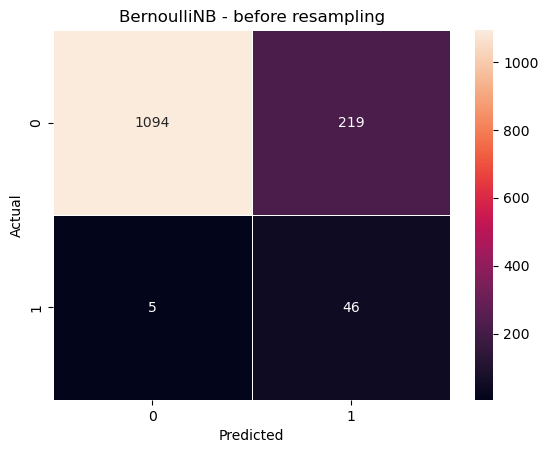

In [62]:
# Plot the confusion matrix

cmap = sns.diverging_palette(180, 180, as_cmap=True)
sns.heatmap(cm_BNB, annot=True, fmt="d", linewidths=.5)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("BernoulliNB - before resampling")

plt.show()

In [63]:
results = evaluate_model('BernoulliNB before resampling', '', bnb, X_test_scaled, y_test, results)
results

[[1094  219]
 [   5   46]]


,note,param,accuracy,precision,recall,f1_score,true_negatives,false_positives,false_negatives,true_positives
0,Logistic regression before resampling,,0.967742,0.733333,0.215686,0.333333,1309,4,40,11
0,Logistic Regression after Oversampling,,0.866569,0.189573,0.784314,0.305344,1142,171,11,40
0,AdaBoostClassifier before OverSampling,,0.966276,0.592593,0.313725,0.410256,1302,11,35,16
0,AdaBoostClassifier after OverSampling,,0.912023,0.248175,0.666667,0.361702,1210,103,17,34
0,BernoulliNB before resampling,,0.835777,0.173585,0.901961,0.291139,1094,219,5,46


In [64]:
# Bernoulli BNB has the highest recall.
# The model has the lowest False negatives (at the expense of precision).

### BNB after oversampling

In [65]:
# Fit the model on the rebalanced dataset
bnb_over = BernoulliNB()
bnb_over.fit(X_train_over, y_train_over)

BernoulliNB()

In [66]:
#Make predictions on the test set using the model trained on the oversampled dataset
pred_rebalanced = bnb_over.predict(X_test_scaled)

print("Rebalanced Dataset:")
print("Accuracy:", accuracy_score(y_test, pred_rebalanced))
print("Precision:", precision_score(y_test, pred_rebalanced))
print("Recall:", recall_score(y_test, pred_rebalanced))
print("F1 Score:", f1_score(y_test, pred_rebalanced))

Rebalanced Dataset:
Accuracy: 0.7785923753665689
Precision: 0.13411078717201166
Recall: 0.9019607843137255
F1 Score: 0.233502538071066


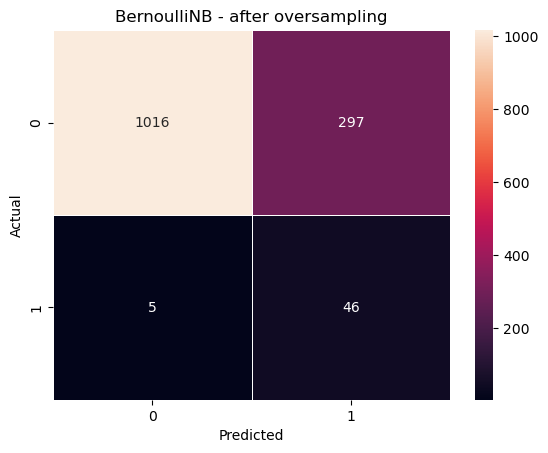

In [67]:
#Confusion matrix

cm_BNB_over = confusion_matrix(y_test, pred_rebalanced)

cmap = sns.diverging_palette(180, 180, as_cmap=True)
sns.heatmap(cm_BNB_over, annot=True, fmt="d", linewidths=.5)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("BernoulliNB - after oversampling")

plt.show()

In [68]:
results = evaluate_model('BernoulliNB after oversampling', '', bnb_over, X_test_scaled, y_test, results)
results

[[1016  297]
 [   5   46]]


,note,param,accuracy,precision,recall,f1_score,true_negatives,false_positives,false_negatives,true_positives
0,Logistic regression before resampling,,0.967742,0.733333,0.215686,0.333333,1309,4,40,11
0,Logistic Regression after Oversampling,,0.866569,0.189573,0.784314,0.305344,1142,171,11,40
0,AdaBoostClassifier before OverSampling,,0.966276,0.592593,0.313725,0.410256,1302,11,35,16
0,AdaBoostClassifier after OverSampling,,0.912023,0.248175,0.666667,0.361702,1210,103,17,34
0,BernoulliNB before resampling,,0.835777,0.173585,0.901961,0.291139,1094,219,5,46
0,BernoulliNB after oversampling,,0.778592,0.134111,0.901961,0.233503,1016,297,5,46


In [69]:
# BernoulliBN works better on the original data.
# Rebalancing hurts the model on all KPI. Only the recall is identical.

#Nusvc

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC

In [75]:
X_train_over, y_train_over

nsvc_over = NuSVC()
nsvc_over.fit(X_train_over, y_train_over)
pred_rebalanced = nsvc_over.predict(X_test_scaled)


In [76]:
print("Rebalanced Dataset:")
print("Accuracy:", accuracy_score(y_test, pred_rebalanced))
print("Precision:", precision_score(y_test, pred_rebalanced))
print("Recall:", recall_score(y_test, pred_rebalanced))
print("F1 Score:", f1_score(y_test, pred_rebalanced))

Rebalanced Dataset:
Accuracy: 0.8269794721407625
Precision: 0.16606498194945848
Recall: 0.9019607843137255
F1 Score: 0.2804878048780488


In [91]:
import pandas as pd

data = {
    'note': ['Nu-SVC model after oversampling'],
    'param': [''],
    'accuracy': [0.8269794721407625],
    'precision': [0.16606498194945848],
    'recall': [0.9019607843137255],
    'f1_score': [0.2804878048780488],
    'true_negatives': ['1082'],
    'false_positives': ['231'],
    'false_negatives': ['5'],
    'true_positives': ['46']
}

df_nusvc = pd.DataFrame(data)
print(df)

                 note param  accuracy  precision    recall  f1_score  \
0  Rebalanced Dataset        0.826979   0.166065  0.901961  0.280488   

  true_negatives false_positives false_negatives true_positives  
0           1082             231               5             46  


In [92]:
df_nusvc

,note,param,accuracy,precision,recall,f1_score,true_negatives,false_positives,false_negatives,true_positives
0,Nu-SVC model after oversampling,,0.826979,0.166065,0.901961,0.280488,1082,231,5,46


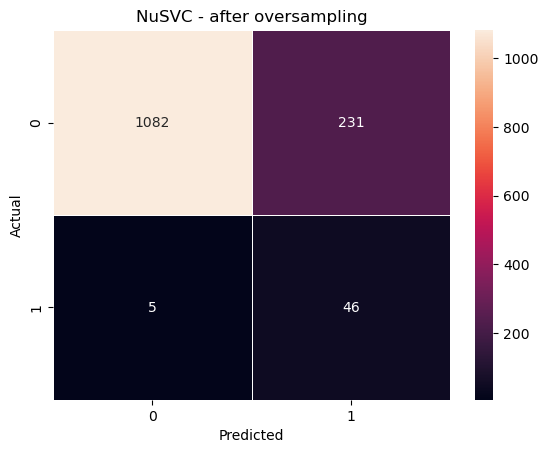

In [78]:
NSVC_over = confusion_matrix(y_test, pred_rebalanced)

cmap = sns.diverging_palette(180, 180, as_cmap=True)
sns.heatmap(NSVC_over, annot=True, fmt="d", linewidths=.5)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NuSVC - after oversampling")

plt.show()

In [70]:
results.to_csv("project7_results.csv")